In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('JC-202112-citibike-tripdata.csv')

df['ended_at'] = df['ended_at'].astype('datetime64[ns]') 
df['started_at'] = df['started_at'].astype('datetime64[ns]') 

df['tempo_corrida'] = ((df['ended_at'] - df['started_at']).dt.total_seconds() / 60).round(2)

df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,tempo_corrida
0,DE8FDF918B766B34,classic_bike,2021-12-22 18:44:12,2021-12-22 18:49:56,Marin Light Rail,JC013,Warren St,JC006,40.714584,-74.042817,40.721124,-74.038051,member,5.73
1,DFFA588D5D188F27,classic_bike,2021-12-11 12:32:58,2021-12-11 12:57:13,Warren St,JC006,Warren St,JC006,40.721124,-74.038051,40.721124,-74.038051,member,24.25
2,3A2A9CA5E1CC449A,classic_bike,2021-12-18 11:08:40,2021-12-18 11:21:10,Warren St,JC006,Warren St,JC006,40.721124,-74.038051,40.721124,-74.038051,member,12.50
3,72216E8C562A4E02,classic_bike,2021-12-11 17:28:08,2021-12-11 17:42:16,5 Corners Library,JC018,Warren St,JC006,40.734961,-74.059503,40.721124,-74.038051,member,14.13
4,A7B30B3C966FD8A1,classic_bike,2021-12-11 10:39:41,2021-12-11 10:54:56,City Hall - Washington St & 1 St,HB105,Warren St,JC006,40.737360,-74.030970,40.721124,-74.038051,casual,15.25


In [6]:
df['tempo_corrida'].describe().round(2)

count    48021.00
mean        19.21
std        115.48
min          0.00
25%          4.47
50%          6.93
75%         10.97
max       5894.17
Name: tempo_corrida, dtype: float64

<AxesSubplot:xlabel='tempo_corrida', ylabel='Count'>

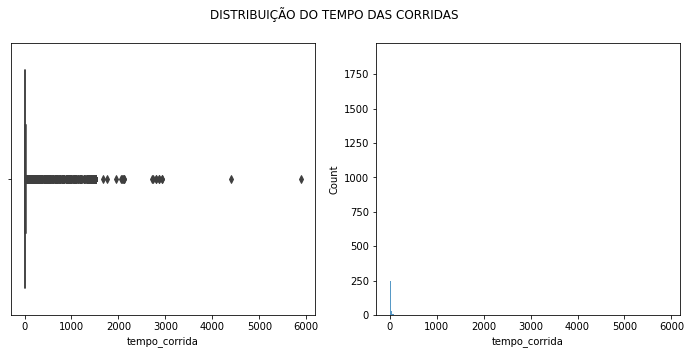

In [7]:
fig, ax = plt.subplots(nrows = 1, ncols= 2, figsize = (12,5)) 

fig.suptitle('DISTRIBUIÇÃO DO TEMPO DAS CORRIDAS')

sns.boxplot( data = df, x = 'tempo_corrida', ax = ax[0] )
sns.histplot( data = df, x = 'tempo_corrida', ax = ax[1] )

In [8]:
df['tempo_corrida'].value_counts()

5.13      107
4.55      107
4.98      106
4.37      102
4.75      101
         ... 
428.55      1
49.27       1
198.67      1
379.40      1
844.78      1
Name: tempo_corrida, Length: 3510, dtype: int64

In [9]:
df['tempo_corrida'].describe()

count    48021.000000
mean        19.210203
std        115.482571
min          0.000000
25%          4.470000
50%          6.930000
75%         10.970000
max       5894.170000
Name: tempo_corrida, dtype: float64

In [10]:
iqr = 10.97 - 4.47
lim_s = 10.79 + ( 1.5 * iqr )

print("IQR:", iqr)
print("Limite Superior:", lim_s)

IQR: 6.500000000000001
Limite Superior: 20.54


<AxesSubplot:xlabel='tempo_corrida', ylabel='Count'>

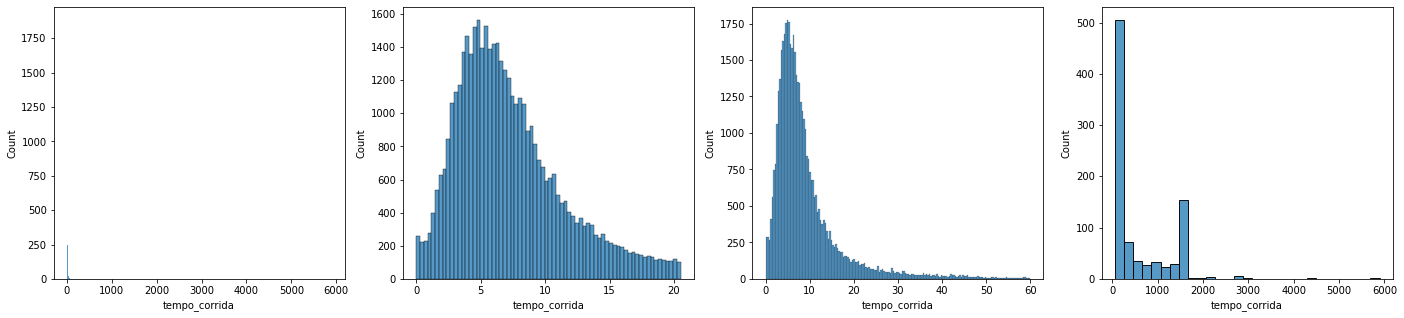

In [11]:
fig, ax = plt.subplots(nrows = 1, ncols= 4, figsize = (24,5)) 

# fig.suptitle('DISTRIBUIÇÃO DO TEMPO DAS CORRIDAS')

sns.histplot( data = df, x = 'tempo_corrida', ax = ax[0] )

sns.histplot( data = df[ df['tempo_corrida'] <= 20.54 ], x = 'tempo_corrida', ax = ax[1] )

sns.histplot( data = df[ df['tempo_corrida'] <= 60 ], x = 'tempo_corrida', ax = ax[2] )

sns.histplot( data = df[ df['tempo_corrida'] > 60 ], x = 'tempo_corrida', ax = ax[3] )

<AxesSubplot:xlabel='tempo_corrida', ylabel='Count'>

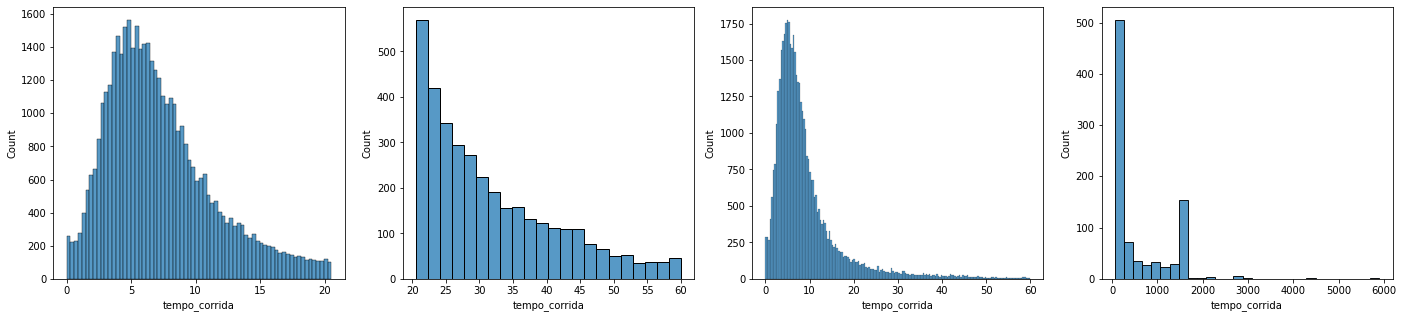

In [12]:
fig, ax = plt.subplots(nrows = 1, ncols= 4, figsize = (24,5)) 

# fig.suptitle('DISTRIBUIÇÃO DO TEMPO DAS CORRIDAS')

sns.histplot( data = df[ df['tempo_corrida'] <= 20.54 ], x = 'tempo_corrida', ax = ax[0] )

sns.histplot( data = df[ (df['tempo_corrida'] >= 20.54) & (df['tempo_corrida'] <= 60) ], x = 'tempo_corrida', ax = ax[1] )

sns.histplot( data = df[ df['tempo_corrida'] <= 60 ], x = 'tempo_corrida', ax = ax[2] )

sns.histplot( data = df[ df['tempo_corrida'] > 60 ], x = 'tempo_corrida', ax = ax[3] )

In [13]:
df['tempo_corrida'].describe()

count    48021.000000
mean        19.210203
std        115.482571
min          0.000000
25%          4.470000
50%          6.930000
75%         10.970000
max       5894.170000
Name: tempo_corrida, dtype: float64

<AxesSubplot:xlabel='Tempo das Corridas', ylabel='Contagem'>

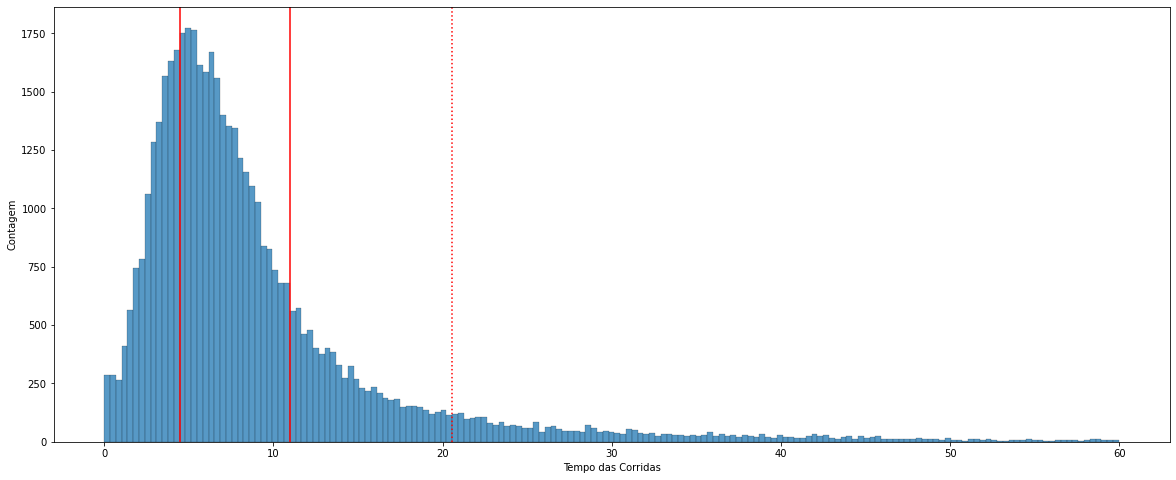

In [18]:
ax = sns.histplot(
    data = df[ df['tempo_corrida'] <= 60 ],
    x = 'tempo_corrida'
)

ax.figure.set_size_inches(20,8)

ax.set_xlabel("Tempo das Corridas")
ax.set_ylabel("Contagem")


plt.axvline(x = 4.47, ymin = 0, ymax = 1750, color = 'red')
plt.axvline(x = 10.97, ymin = 0, ymax = 1750, color = 'red')
plt.axvline(x = 20.54, ymin = 0, ymax = 1750, color = 'red', linestyle = ':')
ax